In [ ]:
try:
  !pip install tensorflow==2.0.0
  !pip install tensorflow_probability==0.8.0
except:
  print("Not Running in colab")

     |████████████████████████████████| 86.3MB 53kB/s 
     |████████████████████████████████| 51kB 6.8MB/s 
     |████████████████████████████████| 450kB 45.9MB/s 
     |████████████████████████████████| 3.8MB 39.0MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7542 sha256=69fac36b11607229fa3ba2705722f28ef65b1ac5daf8758f122beaa6ef729736
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.11.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorflow-estimator 2.3.0
    Uninstalling tensorflow-estimator-2.3.0:
      Successfully uninstalled tensorflow-estimator-2.3.0
  Found existing installation: tensorboard 2.3.0
    Uninstalling tensorboard-2.3.0:
      Successfully uninstal

In [ ]:
import tensorflow as tf
if not(tf.__version__.startswith("2")):
  print("Please Use Tensorflow 2.0 ")
print("Current Tensorflow Version {0}".format(tf.__version__))
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow_probability as tfp

print("Matplotlib Version {0}\nNumpy Version {1}\n".format(matplotlib.__version__, np.__version__))

np.random.seed(42)
tf.random.set_seed(42)

Current Tensorflow Version 2.0.0
Matplotlib Version 3.2.2
Numpy Version 1.18.5



Tensorflow Probability : Normal Distribution

In [ ]:
tfd = tfp.distributions
Norm_distribution = tfd.Normal(loc = 3 , scale = 1.5) # loc = Mean  Scale = STD
x = Norm_distribution.sample(1) # Take Random Sample
px = Norm_distribution.prob(x) # Computer densitiy
print ("The Random Samples {0}".format(x))
print("Density {0}".format(px))


The Random Samples [3.4912028]
Density [0.2520768]


In [ ]:
Dist = tfd.Normal(loc = 1.0 , scale= 0.1)
print("Sample:\t {0}".format(Dist.sample(5))) # Take 2 sample 
print("Prob:\t {0}" .format(Dist.prob((0,1,2,3,4))))
print("log_prob:\t {0}".format(Dist.log_prob((0,1,2,3,4))))
print("cdf:\t {0}".format(Dist.cdf((0,1,2,3,4))))
print("mean:\t {0}".format(Dist.mean()))
print("stddev:\t{0}".format(Dist.stddev()))

Sample:	 [1.0084225  0.9139096  1.0378124  0.99948037 0.9505468 ]
Prob:	 [7.694609e-22 3.989423e+00 7.694609e-22 0.000000e+00 0.000000e+00]
log_prob:	 [ -48.616352     1.3836466  -48.616352  -198.61635   -448.61636  ]
cdf:	 [7.619854e-24 5.000000e-01 1.000000e+00 1.000000e+00 1.000000e+00]
mean:	 1.0
stddev:	0.10000000149011612


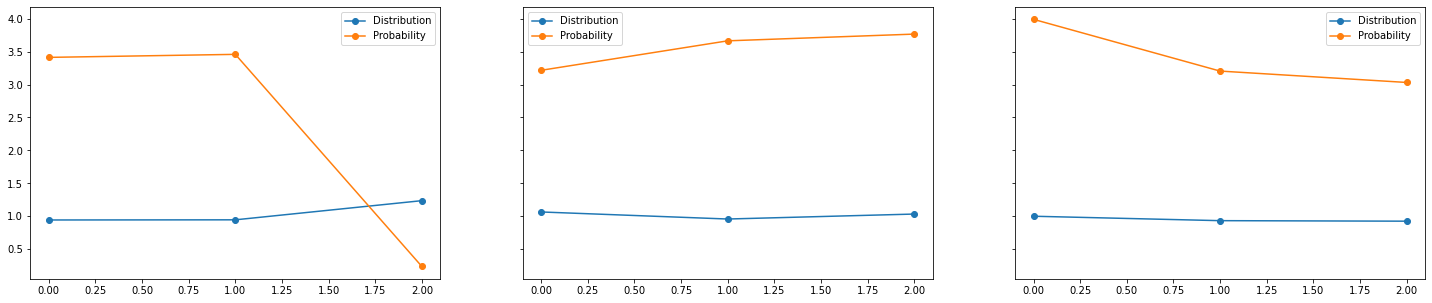

In [ ]:
f, ax = plt.subplots(1,3,figsize=(25,5),sharex=True,sharey=True)
Samples1 = Dist.sample(3).numpy()
Samples2 = Dist.sample(3).numpy()
Samples3 = Dist.sample(3).numpy()
Prob1 = Dist.prob(Samples1).numpy()
Prob2 = Dist.prob(Samples2).numpy()
Prob3 = Dist.prob(Samples3).numpy()

ax[0].plot(Samples1,marker="o")
ax[1].plot(Samples2,marker="o")
ax[2].plot(Samples3,marker="o")
ax[0].plot(Prob1,marker="o")
ax[1].plot(Prob2,marker="o")
ax[2].plot(Prob3,marker="o")
ax[0].legend(["Distribution","Probability"])
ax[1].legend(["Distribution","Probability"])
ax[2].legend(["Distribution","Probability"])

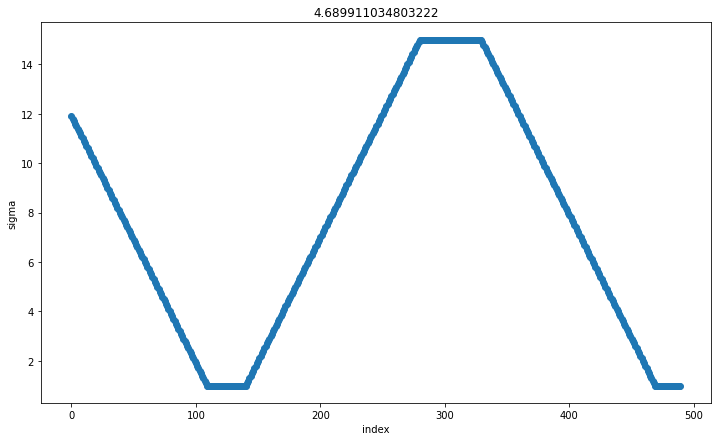

In [ ]:
x1 = np.arange(1,12,0.1)
x1 = x1[::-1] #Revert the x1
x2 = np.repeat(1,30) # Repeat1 30 times
x3 = np.arange(1,15, 0.1)
x4 = np.repeat(15,50)
x5 = x3[::-1]
x6 = np.repeat(1,20)

x = np.concatenate([x1,x2,x3,x4,x5,x6])
x.shape

f,ax = plt.subplots(1,1,figsize=(12,7))
ax.plot(x,marker="o")
ax.set(title=x.std(),xlabel ="index",ylabel="sigma")
f.show()

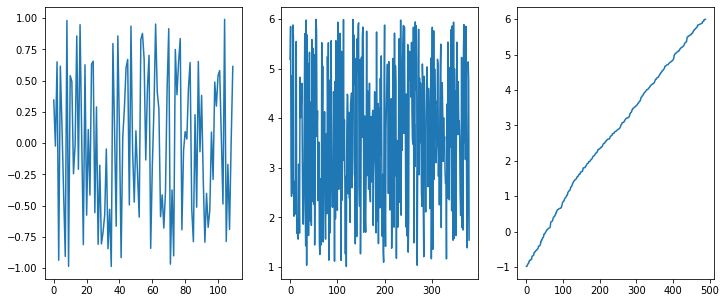

In [ ]:
# Creating Data
np.random.seed(4710)
noise = np.random.normal(loc =0 ,scale=x ,size=len(x) )
np.random.seed(99)
first_part = len(x1)
x11 = np.random.uniform(-1,1,first_part,)
np.random.seed(97)
x12 = np.random.uniform(1,6,len(noise) - first_part)
f,ax = plt.subplots(1,3,figsize=(12,5))
ax[0].plot(x11)
ax[1].plot(x12)
x = np.concatenate([x11,x12])
x = np.sort(x)
ax[2].plot(x)
f.show()

In [ ]:
y = 2.7 * x + noise
y.shape

(490,)

In [ ]:
y = y.reshape(-1,1)
x = x.reshape(-1,1)
x.shape , y.shape

((490, 1), (490, 1))

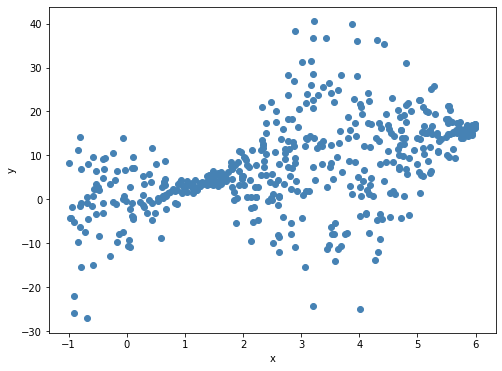

In [ ]:
f,ax = plt.subplots(1,1,figsize=(8,6))
ax.scatter(x,y,color="steelblue")
ax.set(xlabel="x", ylabel="y")
f.show()

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.25,random_state=47)
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=0.2, random_state = 22)


print("Number of training samples : {0}\nNumber of Validation samples : {1}\nNumber of test Samples: {2}".format(len(x_train),len(x_val),len(x_test)))

Number of training samples : 293
Number of Validation samples : 74
Number of test Samples: 123


In [ ]:
lol = np.array([72,3,5,56,7,87])
lol.argsort(axis=0)

array([1, 2, 4, 3, 0, 5])

In [ ]:
order_idx_train = np.squeeze(x_train.argsort(axis=0))
x_train = x_train[order_idx_train]
y_train = y_train[order_idx_train]

order_idx_val = np.squeeze(x_val.argsort(axis=0))
x_val = x_val[order_idx_val]
y_val = y_val[order_idx_val]

order_idx_test = np.squeeze(x_val.argsort(axis=0))
x_test = x_test[order_idx_test]
y_test = y_test[order_idx_test]

[Text(0.5, 1.0, 'Test')]

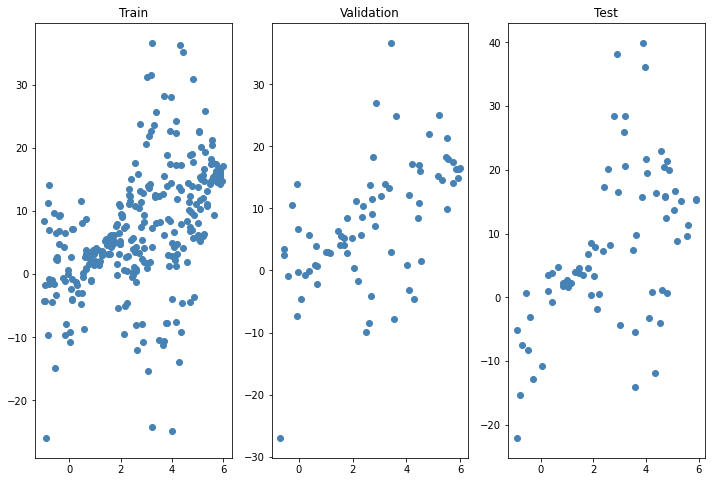

In [ ]:
f,ax = plt.subplots(1,3,figsize=(12,8))
ax[0].scatter(x_train, y_train,color="steelblue")
ax[1].scatter(x_val,y_val,color="steelblue")
ax[2].scatter(x_test, y_test,color="steelblue")
ax[0].set(title="Train") ; ax[1].set(title="Validation") ; ax[2].set(title="Test")

In [ ]:
#Fit a linear regression model with constant variance
def NLL(ytrue, distr):
  return -distr.log_prob(ytrue)
def my_dist(params):
  return tfd.Normal(loc=params,scale=1)

inputs = tf.keras.layers.Input(shape=(1,))
layers = tf.keras.layers.Dense(15)(inputs)
layers = tf.keras.layers.Dense(100)(layers)

dist = tfp.layers.DistributionLambda(my_dist)(layers)
model1 = tf.keras.Model(inputs=inputs, outputs = dist)
model1.compile(optimizer=tf.keras.optimizers.Adam(),loss=NLL)

model1.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense_8 (Dense)              (None, 15)                30        
_________________________________________________________________
dense_9 (Dense)              (None, 100)               1600      
_________________________________________________________________
distribution_lambda_5 (Distr ((None, 100), (None, 100) 0         
Total params: 1,630
Trainable params: 1,630
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model1.fit(x_train,y_train,epochs = 100,verbose= 0 ,validation_data=[x_val,y_val])

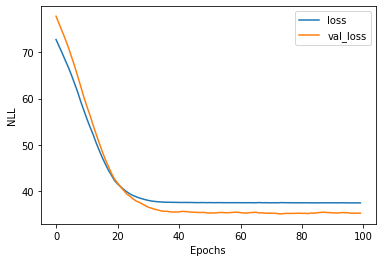

In [ ]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.ylabel('NLL')
plt.xlabel('Epochs')
plt.show()